<a href="https://colab.research.google.com/github/jjiho/20141001-Lee-Jiho/blob/master/Assignment2_02_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

In [10]:
 # import data with numpy
from google.colab import drive
drive.mount('/content/gdrive/')

data = np.genfromtxt("/content/gdrive/My Drive/profit_population.txt", delimiter=',')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


[]

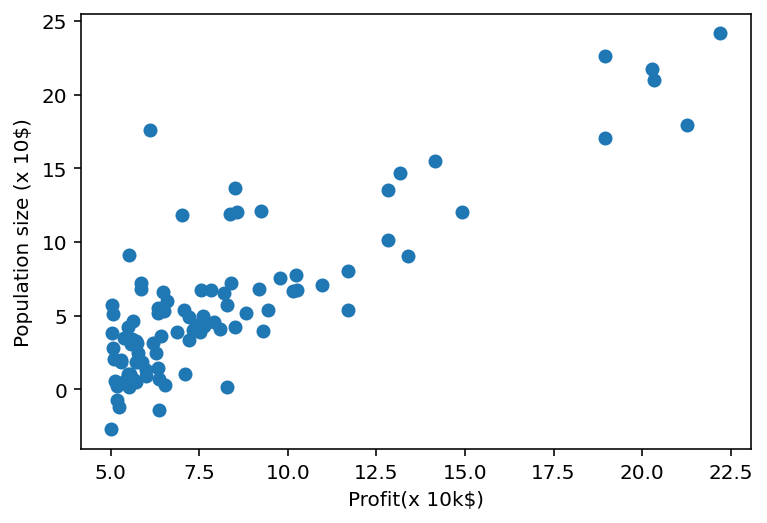

In [12]:
x_train = data[:,0]
y_train = data[:,1]

plt.figure()
plt.xlabel("Profit(x 10k$)")
plt.ylabel("Population size (x 10$)")
plt.scatter(x_train, y_train,)
plt.plot()

In [73]:
# construct data matrix
a = np.ones(len(x_train))
X = np.array([a, x_train])
X = X.T

# parameters vector
w = np.zeros((2, 1))

# predictive function definition
def f_pred(X,w): 
    
    f = np.dot(X, w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)

In [66]:
 # loss function definition
def loss_mse(y_pred,y): 
    loss = (1 / len(x_train)) * np.dot((y_pred - y).T, (y_pred - y))
    
    return loss


# Test loss function 
y = y_train.T.reshape(len(y), 1)# label

loss = loss_mse(y_pred,y)
print(loss)

(97, 1)
[[64.14546775]]


In [46]:
# gradient function definition
def grad_loss(y_pred,y,X):
    grad = (2 / len(y_pred)) * np.dot(X.T, (y_pred - y))
    return grad


# Test grad function 
grad = grad_loss(y_pred, y, X)
print(grad)

[[ -11.6782701 ]
 [-130.65769949]]


Time= 0.027460813522338867
8.95605670155327
[-3.78841926  1.18224801]


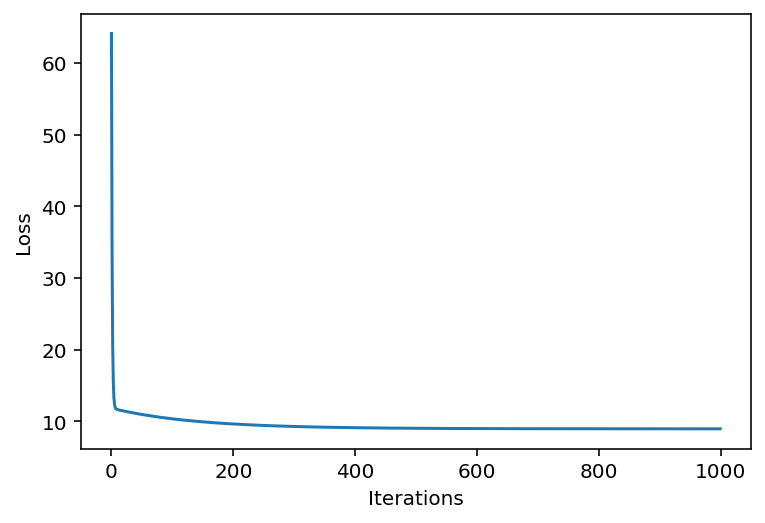

In [87]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.zeros(max_iter)# record the loss values
    w_iters = np.zeros((max_iter, 2))# record the parameter values
    w = w_init # initializationz
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w)# linear predicition function
        y_pred = y_pred.reshape(len(y_pred), 1)
        grad_f = loss_mse(y_pred, y)# gradient of the loss
        w = w - tau * grad_loss(y_pred, y, X).reshape(2)# update rule of gradient descent
        L_iters[i] = grad_f# save the current loss value 
        w_iters[i,:] = w # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = np.array([0, 0])
tau = 0.01
max_iter = 1000

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[-1]) # plot the last value of the loss
print(w_iters[-1]) # plot the last value of the parameter w 


# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

No handles with labels found to put in legend.


[-3.78841926 -3.48987179 -3.19132431 -2.89277683 -2.59422936 -2.29568188
 -1.99713441 -1.69858693 -1.40003945 -1.10149198 -0.8029445  -0.50439702
 -0.20584955  0.09269793  0.3912454   0.68979288  0.98834036  1.28688783
  1.58543531  1.88398278  2.18253026  2.48107774  2.77962521  3.07817269
  3.37672016  3.67526764  3.97381512  4.27236259  4.57091007  4.86945754
  5.16800502  5.4665525   5.76509997  6.06364745  6.36219492  6.6607424
  6.95928988  7.25783735  7.55638483  7.85493231  8.15347978  8.45202726
  8.75057473  9.04912221  9.34766969  9.64621716  9.94476464 10.24331211
 10.54185959 10.84040707 11.13895454 11.43750202 11.73604949 12.03459697
 12.33314445 12.63169192 12.9302394  13.22878687 13.52733435 13.82588183
 14.1244293  14.42297678 14.72152426 15.02007173 15.31861921 15.61716668
 15.91571416 16.21426164 16.51280911 16.81135659 17.10990406 17.40845154
 17.70699902 18.00554649 18.30409397 18.60264144 18.90118892 19.1997364
 19.49828387 19.79683135 20.09537882 20.3939263  20.6

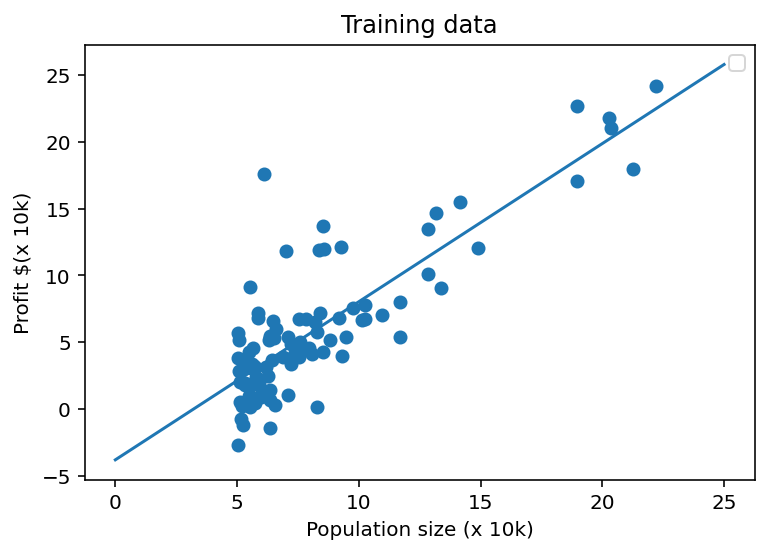

In [95]:
 # linear regression model
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
one = np.ones(len(x_pred))
x = np.array([one, x_pred]).T
y_pred = f_pred(x, w_iters[-1])# compute the prediction values within the given domain x_predprint
print(y_pred)
# plot
plt.figure(3)
plt.scatter(x_train, y_train)
plt.plot(x_pred, y_pred)
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

No handles with labels found to put in legend.


Time= 0.0008649826049804688
loss sklearn= [[11.71731181]]
loss gradient descent= 8.95605670155327


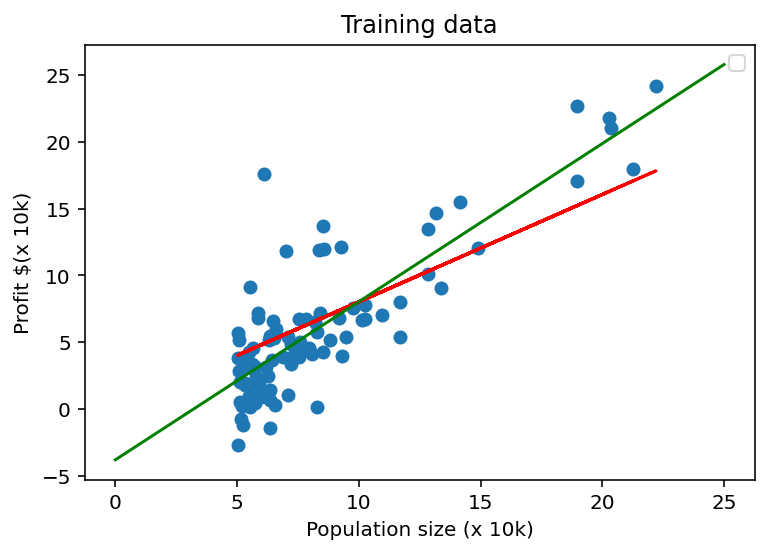

In [119]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression(fit_intercept = False)
lin_reg_sklearn.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1)) # learn the model parameters
print('Time=',time.time() - start)

# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

loss_sklearn = loss_mse(f_pred(X.reshape(len(X), 2), w_sklearn), y_train.reshape(-1, 1)) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1])


# plot
y_pred_sklearn = f_pred(X, w_sklearn)# prediction obtained by the sklearn library

plt.figure(3)

plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_sklearn, color = 'red')
plt.plot(x_pred, y_pred, color = 'green')
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()
